# Training a neural network on MNIST with Keras

This simple example demonstrates how to plug TensorFlow Datasets (TFDS) into a Keras model.


## This example use neural network on Tensorflow datasets and use MNIST data set
*mnist dataset has 70000 images each image is number between 0 to 9 handwritten 

*60000 images for training and 10000 for testing

*labels of data between 0-9

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

### Load a dataset

Load the MNIST dataset with the following arguments:

* `shuffle_files=True`: The MNIST data is only stored in a single file, but for larger datasets with multiple files on disk, it's good practice to shuffle them when training.
* `as_supervised=True`: Returns a tuple `(img, label)` instead of a dictionary `{'image': img, 'label': label}`.

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

### Build a training pipeline

Apply the following transformations:

* `tf.data.Dataset.map`: TFDS provide images of type `tf.uint8`, while the model expects `tf.float32`. Therefore, you need to normalize images.
* `tf.data.Dataset.cache` As you fit the dataset in memory, cache it before shuffling for a better performance.<br/>
__Note:__ Random transformations should be applied after caching.
* `tf.data.Dataset.shuffle`: For true randomness, set the shuffle buffer to the full dataset size.<br/>
__Note:__ For large datasets that can't fit in memory, use `buffer_size=1000` if your system allows it.
* `tf.data.Dataset.batch`: Batch elements of the dataset after shuffling to get unique batches at each epoch.
* `tf.data.Dataset.prefetch`: It is good practice to end the pipeline by prefetching [for performance](https://www.tensorflow.org/guide/data_performance#prefetching).

In [3]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

### Build an evaluation pipeline

Your testing pipeline is similar to the training pipeline with small differences:

 * You don't need to call `tf.data.Dataset.shuffle`.
 * Caching is done after batching because batches can be the same between epochs.

In [4]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

### *mean a python scalar or a scalar tensor. Mean of the random values to generate.
### *stddev	a python scalar or a scalar tensor. Standard deviation of the random values to generate.

In [5]:
# Standalone usage:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)

## Step 2: Create and train the model

Plug the TFDS input pipeline into a simple Keras model, compile the model, and train it.

## 1) we use SGD optimizer with learning rate (0.001)&(0.01) and 6 epochs and relu activation

In [6]:
### we use SGD optimizer with learning rate 0.001 and 6 epochs and relu activation
learning_rate = 0.001
n_epochs = 6
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer),
  tf.keras.layers.Dense(10, kernel_initializer=initializer)
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
history = model.fit(
    ds_train,
    epochs=n_epochs,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 7s 7ms/step - loss: 53.0765 - sparse_categorical_accuracy: 0.1969 - val_loss: 31.7674 - val_sparse_categorical_accuracy: 0.3032
Epoch 2/6
469/469 [==============================] - 3s 6ms/step - loss: 25.7407 - sparse_categorical_accuracy: 0.3782 - val_loss: 19.3479 - val_sparse_categorical_accuracy: 0.4666
Epoch 3/6
469/469 [==============================] - 2s 4ms/step - loss: 17.7511 - sparse_categorical_accuracy: 0.5002 - val_loss: 14.5066 - val_sparse_categorical_accuracy: 0.5579
Epoch 4/6
469/469 [==============================] - 2s 4ms/step - loss: 14.0543 - sparse_categorical_accuracy: 0.5706 - val_loss: 11.9084 - val_sparse_categorical_accuracy: 0.6107
Epoch 5/6
469/469 [==============================] - 2s 3ms/step - loss: 11.8677 - sparse_categorical_accuracy: 0.6158 - val_loss: 10.2711 - val_sparse_categorical_accuracy: 0.6496
Epoch 6/6
469/469 [==============================] - 2s 5ms/step - loss: 10.3993 - sparse_categ

### val_accuracy is the value of accuracy for your cross-validation data and accuracy is the value of accuracy for your training data

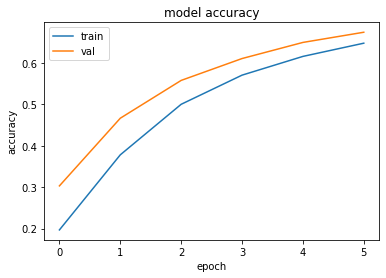

In [7]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### val_loss is the value of cost function for your cross-validation data and loss is the value of cost function for your training data

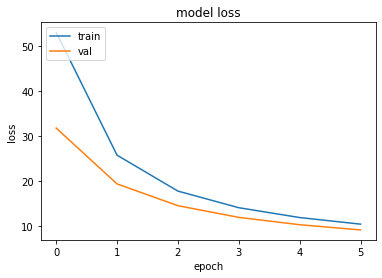

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [9]:
### we use SGD optimizer with learning rate 0.01 and 6 epochs and relu activation
learning_rate = 0.01
n_epochs = 6
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer),
  tf.keras.layers.Dense(10, kernel_initializer=initializer)
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
history = model.fit(
    ds_train,
    epochs=n_epochs,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 2s 4ms/step - loss: 17.6526 - sparse_categorical_accuracy: 0.5931 - val_loss: 6.9579 - val_sparse_categorical_accuracy: 0.7620
Epoch 2/6
469/469 [==============================] - 2s 5ms/step - loss: 5.9738 - sparse_categorical_accuracy: 0.7832 - val_loss: 4.7276 - val_sparse_categorical_accuracy: 0.8144
Epoch 3/6
469/469 [==============================] - 2s 5ms/step - loss: 4.4313 - sparse_categorical_accuracy: 0.8215 - val_loss: 3.8389 - val_sparse_categorical_accuracy: 0.8384
Epoch 4/6
469/469 [==============================] - 1s 3ms/step - loss: 3.6707 - sparse_categorical_accuracy: 0.8417 - val_loss: 3.2868 - val_sparse_categorical_accuracy: 0.8483
Epoch 5/6
469/469 [==============================] - 3s 7ms/step - loss: 3.1898 - sparse_categorical_accuracy: 0.8524 - val_loss: 2.8981 - val_sparse_categorical_accuracy: 0.8610
Epoch 6/6
469/469 [==============================] - 3s 5ms/step - loss: 2.8336 - sparse_categorical_acc

### if we use 0.01 learning rate the accurcy is better than after 6 epochs and loss is least

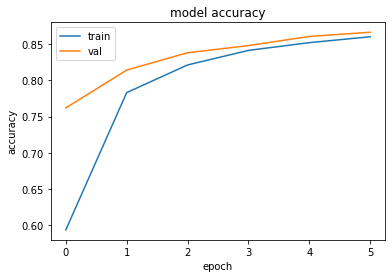

In [10]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

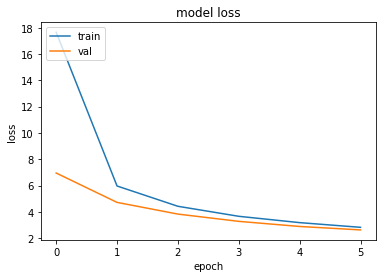

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 2)we use RMSprop optimizer with learning rate (0.001)&(0.01) and 20 epochs and relu activation

In [12]:
### we use RMSprop optimizer with learning rate 0.001 and 20 epochs and relu activation
learning_rate = 0.001
n_epochs = 20
model = tf.keras.models.Sequential([  tf.keras.layers.Flatten(input_shape=(28, 28)), tf.keras.layers.Dense(128, activation='relu', 
                                                kernel_initializer=initializer),
  tf.keras.layers.Dense(10, kernel_initializer=initializer)])
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
history = model.fit(   ds_train,  epochs=n_epochs,validation_data=ds_test,)

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 15.1480 - sparse_categorical_accuracy: 0.6442 - val_loss: 4.7983 - val_sparse_categorical_accuracy: 0.8265
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 3.7059 - sparse_categorical_accuracy: 0.8514 - val_loss: 3.0365 - val_sparse_categorical_accuracy: 0.8743
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 2.4872 - sparse_categorical_accuracy: 0.8852 - val_loss: 2.3046 - val_sparse_categorical_accuracy: 0.8912
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8966 - sparse_categorical_accuracy: 0.9027 - val_loss: 1.9188 - val_sparse_categorical_accuracy: 0.9025
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 1.5319 - sparse_categorical_accuracy: 0.9148 - val_loss: 1.6721 - val_sparse_categorical_accuracy: 0.9111
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 1.2752 - sparse_categoric

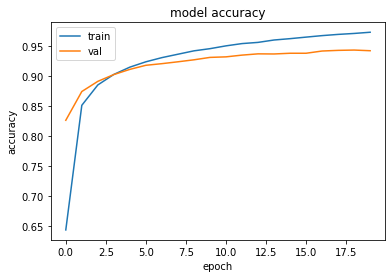

In [13]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

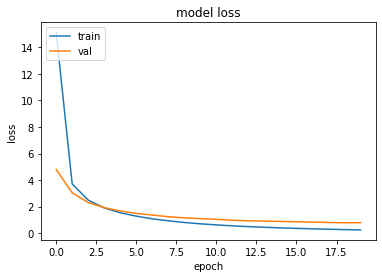

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
### we use RMSprop optimizer with learning rate 0.01 and 20 epochs and relu activation
learning_rate = 0.01
n_epochs = 20
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer),
  tf.keras.layers.Dense(10, kernel_initializer=initializer)
])
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
history = model.fit(
    ds_train,
    epochs=n_epochs,
    validation_data=ds_test,
)

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 3.8873 - sparse_categorical_accuracy: 0.8621 - val_loss: 1.0338 - val_sparse_categorical_accuracy: 0.9214
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.6678 - sparse_categorical_accuracy: 0.9362 - val_loss: 0.5362 - val_sparse_categorical_accuracy: 0.9433
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3353 - sparse_categorical_accuracy: 0.9537 - val_loss: 0.4245 - val_sparse_categorical_accuracy: 0.9488
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2221 - sparse_categorical_accuracy: 0.9638 - val_loss: 0.3926 - val_sparse_categorical_accuracy: 0.9549
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1694 - sparse_categorical_accuracy: 0.9702 - val_loss: 0.3792 - val_sparse_categorical_accuracy: 0.9518
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1405 - sparse_categorica

#### if we use 0.01 learning rate we can stop at epoch 14 or 15
#### if we use 0.001 learning rate we can add epochs more than 20

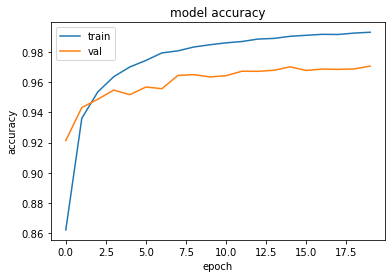

In [16]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

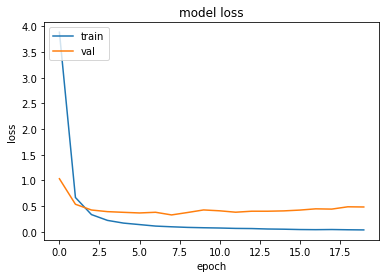

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 3)we use Adam optimizer with learning rate (0.0001)&(0.001) and 25 epochs and relu activation

In [18]:
### we use Adam optimizer with learning rate 0.0001 and 25 epochs and relu activation
learning_rate = 0.0001
n_epochs = 25
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer),
  tf.keras.layers.Dense(10, kernel_initializer=initializer)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
history = model.fit(
    ds_train,
    epochs=n_epochs,
    validation_data=ds_test,
)

Epoch 1/25
469/469 [==============================] - 2s 3ms/step - loss: 65.6531 - sparse_categorical_accuracy: 0.1244 - val_loss: 45.1292 - val_sparse_categorical_accuracy: 0.1857
Epoch 2/25
469/469 [==============================] - 2s 5ms/step - loss: 33.6328 - sparse_categorical_accuracy: 0.2886 - val_loss: 24.8609 - val_sparse_categorical_accuracy: 0.3857
Epoch 3/25
469/469 [==============================] - 3s 5ms/step - loss: 20.4102 - sparse_categorical_accuracy: 0.4624 - val_loss: 16.3599 - val_sparse_categorical_accuracy: 0.5304
Epoch 4/25
469/469 [==============================] - 2s 3ms/step - loss: 14.4145 - sparse_categorical_accuracy: 0.5753 - val_loss: 12.0941 - val_sparse_categorical_accuracy: 0.6192
Epoch 5/25
469/469 [==============================] - 2s 5ms/step - loss: 11.1311 - sparse_categorical_accuracy: 0.6463 - val_loss: 9.6014 - val_sparse_categorical_accuracy: 0.6769
Epoch 6/25
469/469 [==============================] - 2s 5ms/step - loss: 9.0779 - sparse_c

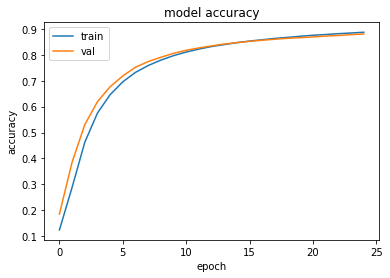

In [19]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


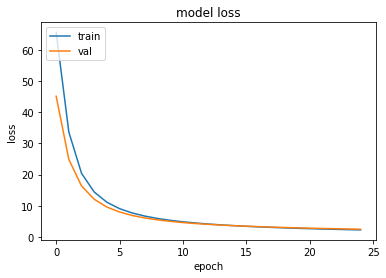

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [21]:
### we use Adam optimizer with learning rate 0.001 and 25 epochs and relu activation
learning_rate = 0.001
n_epochs = 25
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer),
  tf.keras.layers.Dense(10, kernel_initializer=initializer)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
history = model.fit(
    ds_train,
    epochs=n_epochs,
    validation_data=ds_test,
)


Epoch 1/25
469/469 [==============================] - 3s 6ms/step - loss: 22.7571 - sparse_categorical_accuracy: 0.5739 - val_loss: 6.1785 - val_sparse_categorical_accuracy: 0.7935
Epoch 2/25
469/469 [==============================] - 2s 5ms/step - loss: 4.8959 - sparse_categorical_accuracy: 0.8271 - val_loss: 3.8557 - val_sparse_categorical_accuracy: 0.8575
Epoch 3/25
469/469 [==============================] - 2s 5ms/step - loss: 3.3629 - sparse_categorical_accuracy: 0.8697 - val_loss: 2.9624 - val_sparse_categorical_accuracy: 0.8798
Epoch 4/25
469/469 [==============================] - 2s 5ms/step - loss: 2.5888 - sparse_categorical_accuracy: 0.8896 - val_loss: 2.4401 - val_sparse_categorical_accuracy: 0.8932
Epoch 5/25
469/469 [==============================] - 3s 5ms/step - loss: 2.0844 - sparse_categorical_accuracy: 0.9026 - val_loss: 2.0914 - val_sparse_categorical_accuracy: 0.9050
Epoch 6/25
469/469 [==============================] - 3s 5ms/step - loss: 1.7188 - sparse_categoric

### if we use 0.001 learning rate the accurcy is better than after 25 epochs and loss is least
### if we use 0.0001 learning rate ,we should add the epochs more than 25

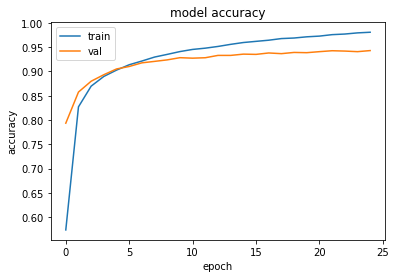

In [22]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

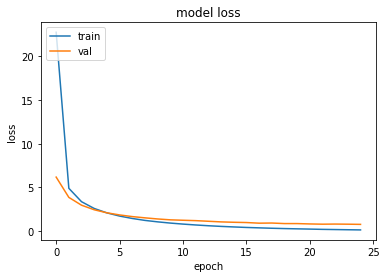

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 4)we use Adadelta optimizer with learning rate (0.0001)&(0.01) and 10 epochs and relu activation

In [24]:
### we use Adadelta optimizer with learning rate 0.0001 and 10 epochs and relu activation
learning_rate = 0.0001
n_epochs = 10
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer),
  tf.keras.layers.Dense(10, kernel_initializer=initializer)
])
model.compile(
    optimizer=tf.keras.optimizers.Adadelta(learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
history = model.fit(
    ds_train,
    epochs=n_epochs,
    validation_data=ds_test,
)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 138.5732 - sparse_categorical_accuracy: 0.1086 - val_loss: 142.1284 - val_sparse_categorical_accuracy: 0.1060
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 138.1823 - sparse_categorical_accuracy: 0.1088 - val_loss: 141.6915 - val_sparse_categorical_accuracy: 0.1060
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 137.7414 - sparse_categorical_accuracy: 0.1088 - val_loss: 141.2140 - val_sparse_categorical_accuracy: 0.1058
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 137.2666 - sparse_categorical_accuracy: 0.1089 - val_loss: 140.7056 - val_sparse_categorical_accuracy: 0.1057
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 136.7667 - sparse_categorical_accuracy: 0.1089 - val_loss: 140.1744 - val_sparse_categorical_accuracy: 0.1058
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 136.24

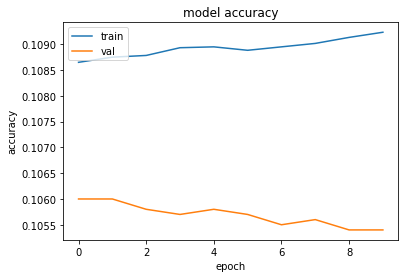

In [25]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

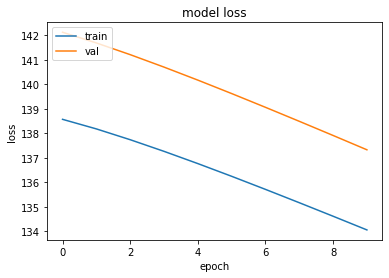

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
### we use Adadelta optimizer with learning rate 0.01 and 10 epochs and relu activation
learning_rate = 0.01
n_epochs = 10
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer),
  tf.keras.layers.Dense(10, kernel_initializer=initializer)
])
model.compile(
    optimizer=tf.keras.optimizers.Adadelta(learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
history = model.fit(
    ds_train,
    epochs=n_epochs,
    validation_data=ds_test,
)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 120.6939 - sparse_categorical_accuracy: 0.0697 - val_loss: 111.8648 - val_sparse_categorical_accuracy: 0.0710
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 101.0538 - sparse_categorical_accuracy: 0.0764 - val_loss: 93.5405 - val_sparse_categorical_accuracy: 0.0766
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 85.2078 - sparse_categorical_accuracy: 0.0866 - val_loss: 79.6396 - val_sparse_categorical_accuracy: 0.0895
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 73.4716 - sparse_categorical_accuracy: 0.1050 - val_loss: 69.5980 - val_sparse_categorical_accuracy: 0.1076
Epoch 5/10
469/469 [==============================] - 4s 7ms/step - loss: 64.8064 - sparse_categorical_accuracy: 0.1259 - val_loss: 61.9127 - val_sparse_categorical_accuracy: 0.1305
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 57.9844 - spa

### if we use 0.0001 learning rate the accuracy  and loss is very bad
### if we use 0.01 learning rate the accuracy  and loss is better but still  bad but we can add more epochs

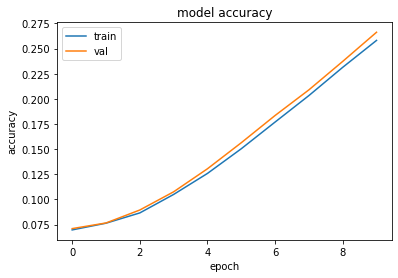

In [28]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

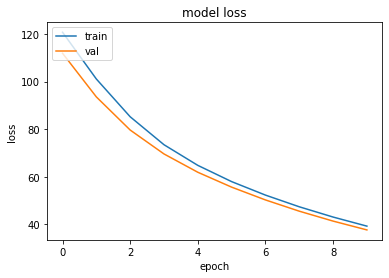

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 5)we use Adagrad optimizer with learning rate (0.01)&(0.001) and 15 epochs and relu activation

In [31]:
### we use Adagrad optimizer with learning rate 0.01 and 15 epochs and relu activation
learning_rate = 0.01
n_epochs = 15
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer),
  tf.keras.layers.Dense(10, kernel_initializer=initializer)])
model.compile(
    optimizer=tf.keras.optimizers.Adagrad(learning_rate), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],)
history = model.fit(ds_train,epochs=n_epochs,validation_data=ds_test,)

Epoch 1/15
469/469 [==============================] - 2s 3ms/step - loss: 17.2339 - sparse_categorical_accuracy: 0.5944 - val_loss: 7.8225 - val_sparse_categorical_accuracy: 0.7388
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 6.8479 - sparse_categorical_accuracy: 0.7678 - val_loss: 5.5930 - val_sparse_categorical_accuracy: 0.8010
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 5.3561 - sparse_categorical_accuracy: 0.8074 - val_loss: 4.6956 - val_sparse_categorical_accuracy: 0.8259
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 4.6059 - sparse_categorical_accuracy: 0.8272 - val_loss: 4.1634 - val_sparse_categorical_accuracy: 0.8395
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 4.1228 - sparse_categorical_accuracy: 0.8401 - val_loss: 3.8277 - val_sparse_categorical_accuracy: 0.8498
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 3.7808 - sparse_categoric

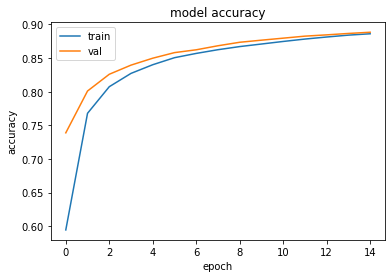

In [32]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

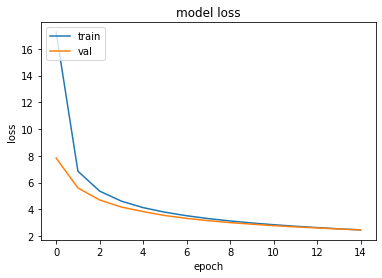

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [34]:
### we use Adagrad optimizer with learning rate 0.001 and 15 epochs and relu activation
learning_rate = 0.001
n_epochs = 15
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer),
  tf.keras.layers.Dense(10, kernel_initializer=initializer)
])
model.compile(
    optimizer=tf.keras.optimizers.Adagrad(learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
history = model.fit(
    ds_train,
    epochs=n_epochs,
    validation_data=ds_test,
)

Epoch 1/15
469/469 [==============================] - 3s 3ms/step - loss: 49.8856 - sparse_categorical_accuracy: 0.1708 - val_loss: 38.8532 - val_sparse_categorical_accuracy: 0.2355
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 33.9501 - sparse_categorical_accuracy: 0.2757 - val_loss: 29.8823 - val_sparse_categorical_accuracy: 0.3223
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 27.3611 - sparse_categorical_accuracy: 0.3514 - val_loss: 25.0237 - val_sparse_categorical_accuracy: 0.3849
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 23.4521 - sparse_categorical_accuracy: 0.4054 - val_loss: 21.8562 - val_sparse_categorical_accuracy: 0.4306
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 20.7986 - sparse_categorical_accuracy: 0.4469 - val_loss: 19.5938 - val_sparse_categorical_accuracy: 0.4667
Epoch 6/15
469/469 [==============================] - 3s 7ms/step - loss: 18.8537 - sparse

### if we use  0.01  learning rate the accuracy is better than after 15 epochs and loss is least
### if we use 0.001 learning rate we should add more epochs

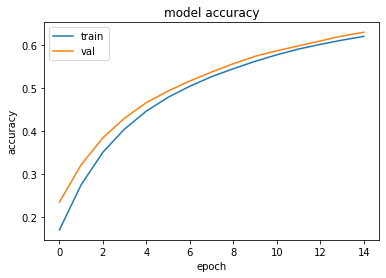

In [35]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

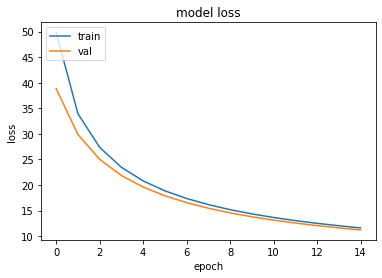

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 6)we use Adamax optimizer with learning rate (0.001)&(0.0001) and 5 epochs and relu activation

In [37]:
### we use Adamax optimizer with learning rate 0.001 and 5 epochs and relu activation
learning_rate = 0.001
n_epochs = 5
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer),
  tf.keras.layers.Dense(10, kernel_initializer=initializer)
])
model.compile(
    optimizer=tf.keras.optimizers.Adamax(learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
history = model.fit(
    ds_train,
    epochs=n_epochs,
    validation_data=ds_test,
)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 31.6727 - sparse_categorical_accuracy: 0.3889 - val_loss: 11.4890 - val_sparse_categorical_accuracy: 0.6228
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 8.8067 - sparse_categorical_accuracy: 0.6959 - val_loss: 6.3063 - val_sparse_categorical_accuracy: 0.7588
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 5.6521 - sparse_categorical_accuracy: 0.7834 - val_loss: 4.5889 - val_sparse_categorical_accuracy: 0.8158
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 4.3077 - sparse_categorical_accuracy: 0.8251 - val_loss: 3.7334 - val_sparse_categorical_accuracy: 0.8417
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 3.5508 - sparse_categorical_accuracy: 0.8482 - val_loss: 3.2101 - val_sparse_categorical_accuracy: 0.8594


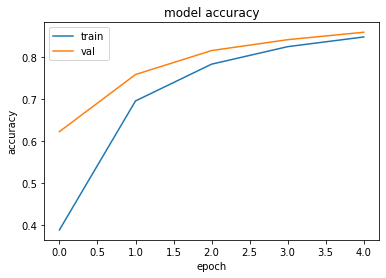

In [38]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

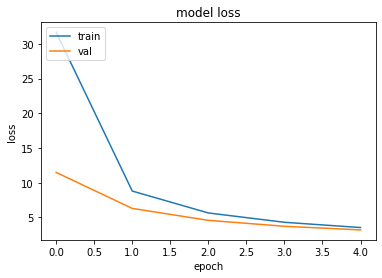

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [40]:
### we use Adamax optimizer with learning rate 0.0001 and 5 epochs and relu activation
learning_rate = 0.0001
n_epochs = 5
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer),
  tf.keras.layers.Dense(10, kernel_initializer=initializer)
])
model.compile(
    optimizer=tf.keras.optimizers.Adamax(learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
history = model.fit(
    ds_train,
    epochs=n_epochs,
    validation_data=ds_test,
)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 77.1471 - sparse_categorical_accuracy: 0.1603 - val_loss: 64.0639 - val_sparse_categorical_accuracy: 0.1696
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 51.2955 - sparse_categorical_accuracy: 0.2118 - val_loss: 44.1978 - val_sparse_categorical_accuracy: 0.2399
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 36.6144 - sparse_categorical_accuracy: 0.2932 - val_loss: 32.1910 - val_sparse_categorical_accuracy: 0.3318
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 27.6372 - sparse_categorical_accuracy: 0.3879 - val_loss: 24.7834 - val_sparse_categorical_accuracy: 0.4293
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 22.0330 - sparse_categorical_accuracy: 0.4704 - val_loss: 20.2544 - val_sparse_categorical_accuracy: 0.5050


### if we use  0.001  learning rate the accuracy and loss is is good at 5 
### if we use 0.0001 learning rate we should add more epochs because the loss is slowly decreasing

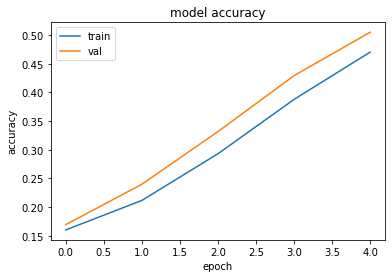

In [41]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

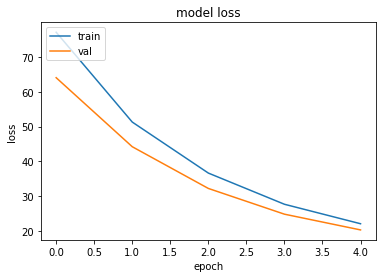

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()